Newton Method


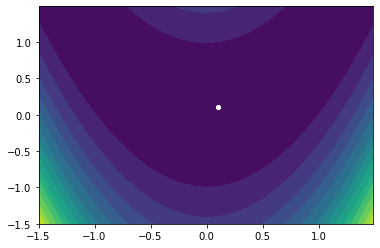

BFGS


C:\Users\lenovo\AppData\Local\Temp/ipykernel_1008/3762802075.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  shik = 1/(np.transpose(yk).dot(save))
C:\Users\lenovo\AppData\Local\Temp/ipykernel_1008/3762802075.py:85: RuntimeWarning: invalid value encountered in double_scalars
  hess = (iden - shik*save.dot(np.transpose(yk))).dot(hess).dot((iden - shik*yk.dot(np.transpose(save)))) + shik*save.dot( np.transpose(save))


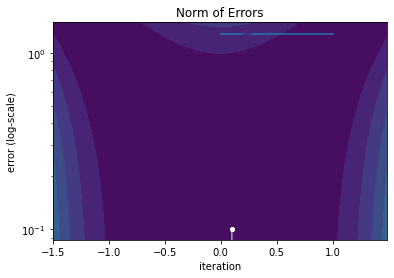

SR1


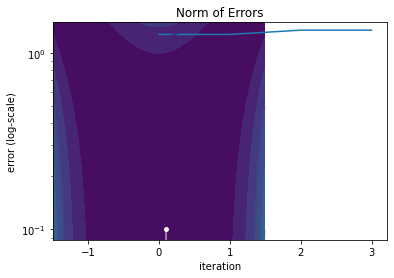

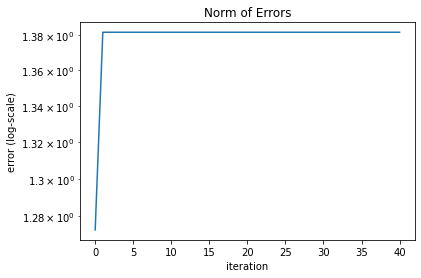

In [6]:

#Saurav Adhikari - 1622912
#Lalita Awasthi - 1622924
#Nila Ravindran - 1614113
import numpy as np

from newton_cg_test import *


def minimization_alg(f, gf, Hessf, x0, callback):
    pass

def broydensymm1(f, gf, Hessf, x0, callback):
    print("SR1")
    d = 1
    B = Hessf(x0)
    gradf = gf(x0)
    s = gradf

    for _ in range(40):
        if norm(s) < 1e-9:
            break

        s = cg(B, gradf, x0)


        rho = (f(x0) - f(x0 + s)) / -(0.5*s.dot(B.dot(s)) + gradf.dot(s))



        if rho < 0.25:

            d = 0.25 * norm(s)



        elif rho > 0.75 and np.abs(norm(s) - d) < 1e-5:

            d = min(2*d, 10)



        if rho > 0.25:

            x0 = x0 + s


            gradf = df(x0)
            B = Hessf(x0)

        if not callback is None:
            callback(x0)
    return x0

def bfgs(f, gf, Hessf, x0, callback):
    tol = 0.00001

    k=0
    print("BFGS")

    norm = np.linalg.norm(x0)
    hess = Hessf(x0)

    while norm >tol:



        gradient = gf(x0)

        pk = -hess.dot(gradient)
        alpha = armijo(f,x0,gradient,pk)

        if not callback is None:
            callback(x0)

        x1 = x0 + alpha * pk

        save = x1 -x0

        yk = gf(x1) - gradient

        iden = np.identity(2)


        shik = 1/(np.transpose(yk).dot(save))
        hess = (iden - shik*save.dot(np.transpose(yk))).dot(hess).dot((iden - shik*yk.dot(np.transpose(save)))) + shik*save.dot( np.transpose(save))
        k=k+1


        x0=x1
        norm = np.linalg.norm(x0)










def newton(f, gf, Hessf, x0, callback):

    tol  = 0.000001
    descent_distance = 0
    print("Newton Method")
    while np.linalg.norm(descent_distance) < tol:
        function = f(x0)
        hess = Hessf(x0)
        gradient = gf(x0)

        descent_distance = -np.linalg.inv(hess) * gradient

        if not callback is None:
            callback(x0)
        x0 = x0 + descent_distance



    return x0
test(newton)
test(bfgs)
test(broydensymm1)


